In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data on which analysis needs to be done

df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()/df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
df.Description.nunique()

4223

In [7]:
# Since CustomerID is unique we will go ahead and drop them
# Since the description for all items will be different there is no point in filling them with mode
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# As we can check that the CustomerID is in float type we are going to convert it to object type variable
df['CustomerID'] = df['CustomerID'].astype(str)

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

### We will analyze the customers based on 3 factors
#### * Recency - The number of days since the last purchase
#### * Frequency- Number of transactions
#### * Monetary- Total number of transactions

### Calculating the total amount of each purchase

In [11]:
df['Amount'] = df['Quantity']*df['UnitPrice']

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [13]:
# To find the Monetary in the data

monetary = df.groupby('CustomerID').sum()['Amount'].reset_index()
monetary

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [14]:
# To find the frequency we need to drop the duplicates of the Invoice number in the data
df.drop_duplicates(subset = 'InvoiceNo').groupby('CustomerID').count()['InvoiceNo']

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [15]:
# Now calculating the frequency of the dataset
frequency = df.drop_duplicates(subset = 'InvoiceNo').groupby('CustomerID').count()['InvoiceNo'].reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [16]:
# Merging the Monetary and Frequency
RFM = pd.merge(monetary, frequency, on = 'CustomerID', how = 'inner')

In [17]:
RFM

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4367,18280.0,180.60,1
4368,18281.0,80.82,1
4369,18282.0,176.60,3
4370,18283.0,2094.88,16


In [18]:
# Now calculating the Recency
import datetime as dt
# Calculating the last date of the entire transaction in the data

last_date = pd.to_datetime(df['InvoiceDate']).max()
last_date

Timestamp('2011-12-10 17:19:00')

In [19]:
df['diff_date'] = last_date - pd.to_datetime(df['InvoiceDate'])

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20,89 days 04:29:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60,89 days 04:29:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60,89 days 04:29:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60,89 days 04:29:00


In [21]:
# Now calculating the minimum difference which will give us the most recent purchase of every customer
Recency = df.groupby('CustomerID')['diff_date'].min().reset_index()

In [22]:
Recency.sort_values('diff_date', ascending = True)

,CustomerID,diff_date
2761,16085.0,0 days 00:00:00
265,12667.0,0 days 00:19:00
213,12607.0,0 days 01:02:00
3510,17096.0,0 days 01:30:00
3399,16945.0,0 days 01:37:00
...,...,...
3129,16583.0,697 days 05:16:00
4096,17908.0,697 days 05:34:00
359,12791.0,697 days 05:52:00
1046,13747.0,697 days 06:42:00


In [23]:
# To extract the number of days only
Recency['diff_date'] = Recency['diff_date'].dt.days

In [24]:
Recency

,CustomerID,diff_date
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4367,18280.0,160
4368,18281.0,4
4369,18282.0,93
4370,18283.0,10


In [25]:
# Now merging the calculated Recency with Monetary and Frequency
RFM = pd.merge(RFM,Recency, on = 'CustomerID', how = 'inner')
RFM.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
RFM

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,7,40
2,12348.0,1797.24,4,76
3,12349.0,1757.55,1,19
4,12350.0,334.40,1,311
...,...,...,...,...
4367,18280.0,180.60,1,160
4368,18281.0,80.82,1,4
4369,18282.0,176.60,3,93
4370,18283.0,2094.88,16,10


## Outlier Analysis of Amount Frequency and Recency

<AxesSubplot:>

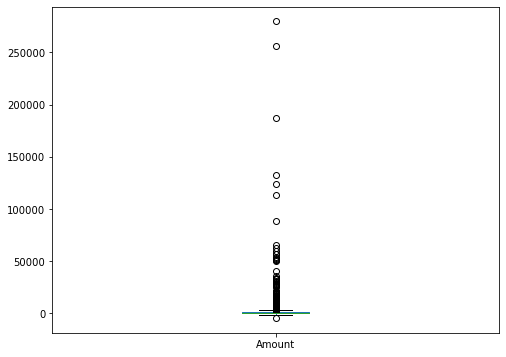

In [26]:
plt.figure(figsize = (8,6))
RFM['Amount'].plot(kind = 'box')

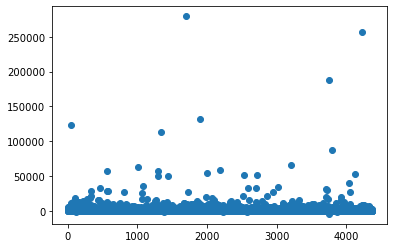

In [27]:
plt.scatter(RFM['Amount'].index, RFM['Amount'])

<AxesSubplot:>

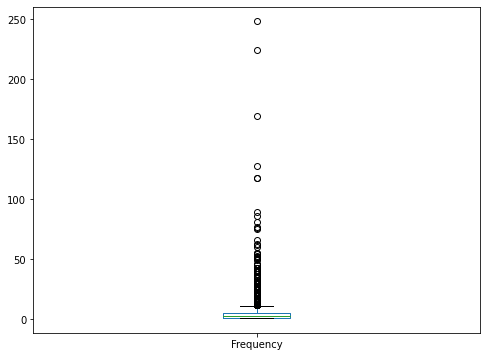

In [28]:
plt.figure(figsize = (8,6))
RFM['Frequency'].plot(kind = 'box')

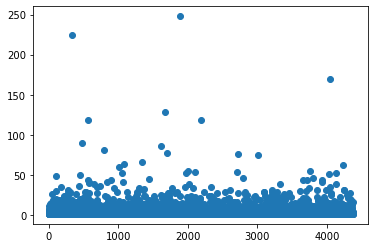

In [29]:
plt.scatter(RFM['Frequency'].index, RFM['Frequency'])

<AxesSubplot:>

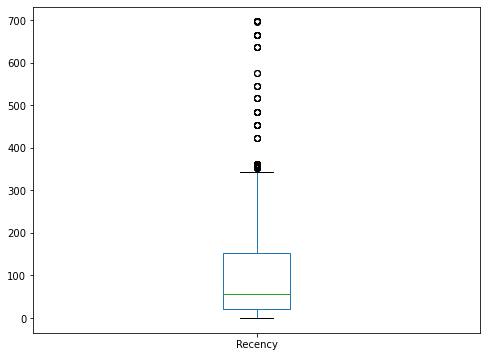

In [30]:
plt.figure(figsize = (8,6))
RFM['Recency'].plot(kind = 'box')

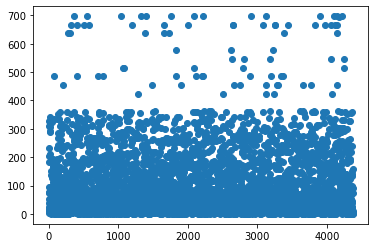

In [31]:
plt.scatter(RFM['Recency'].index, RFM['Recency'])

In [32]:
# As we can check there are Outliers in case of all Recency, Frequency and Amount

# Removing (statistcal) outliers for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3-Q1
cutoff = IQR*1.5
lower = Q1-cutoff
upper = Q3+cutoff
RFM = RFM[(RFM.Recency>=lower) & (RFM.Recency<=upper)]

# Removing (statistcal) outliers for Frquency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3-Q1
cutoff = IQR*1.5
lower = Q1-cutoff
upper = Q3+cutoff
RFM = RFM[(RFM.Frequency>=lower) & (RFM.Frequency<=upper)]

# Removing (statistcal) outliers for Amount
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3-Q1
cutoff = IQR*1.5
lower = Q1-cutoff
upper = Q3+cutoff
RFM = RFM[(RFM.Amount>=lower) & (RFM.Amount<=upper)]

### Rescaling the attributes

In [33]:
rfm_df = RFM[['Amount', 'Frequency', 'Recency']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.147871,-0.449964,2.491529
1,1.521123,0.345748,-0.249114
2,1.462181,-0.847819,-0.873981
3,-0.651270,-0.847819,2.327090
4,1.147143,3.130738,-0.282002


In [36]:
rfm_df_scaled.shape

(3642, 3)

## Building the K-Means model for clustering 

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
k_means = KMeans(n_clusters = 3, max_iter = 100)

In [39]:
k_means.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=3)

In [40]:
k_means.labels_

array([0, 2, 1, ..., 1, 1, 2])

In [41]:
rfm_df_scaled

,Amount,Frequency,Recency
0,-1.147871,-0.449964,2.491529
1,1.521123,0.345748,-0.249114
2,1.462181,-0.847819,-0.873981
3,-0.651270,-0.847819,2.327090
4,1.147143,3.130738,-0.282002
...,...,...,...
3637,-0.889621,-0.847819,-0.271039
3638,-0.879671,-0.847819,0.671742
3639,-1.027849,-0.847819,-1.038419
3640,-0.885611,-0.052108,-0.062750


## Finding the optimum number of Clusters

### 1- Elbow curve to find the right number of clusters

### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [42]:
ssd = list()
k = [i for i in range(2,10)]

In [43]:
k

[2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# The attribute inertia is the sum of square of distances
# We calculate the inertia for different types of cluster models and we will pick the elbow point to determine the number of clusters

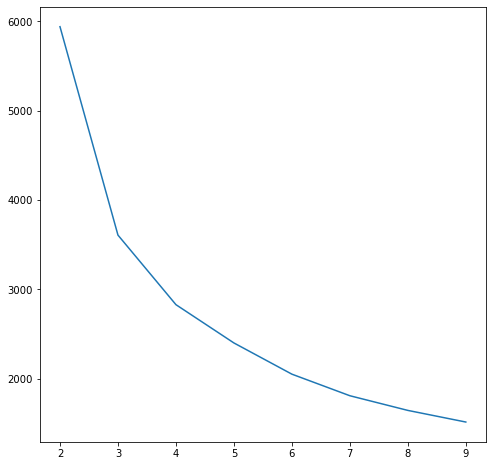

In [45]:
plt.figure(figsize= (8,8))
plt.plot(k,ssd)

In [46]:
# Here we can check the elbow point is at 3 and hence we require 3 clusters and this is the final value of k

## 2 - Silhouette Analysis

#### - The value of silhouette score ranges from -1 to 1 
#### - A score closer to 1 indicates the data point is much similar to other data points in the cluster
#### - A score closer to -1 indicates the data point is not similar to the other data points in the cluster.

In [47]:
from sklearn.metrics import silhouette_score
# Silhouette Analysis
k = [i for i in range(2,10)]
silhouette = list()

for i in k:
    kmeans = KMeans(n_clusters = i, max_iter = 100)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette.append(silhouette_score)
    print("For cluster {}, silhouette score is {}".format(i,silhouette_avg))

For cluster 2, silhouette score is 0.4342999598008003
For cluster 3, silhouette score is 0.42879926253601636
For cluster 4, silhouette score is 0.3982465180943058
For cluster 5, silhouette score is 0.3869651575340896
For cluster 6, silhouette score is 0.35316572954889885
For cluster 7, silhouette score is 0.33916992955329417
For cluster 8, silhouette score is 0.3448742589475174
For cluster 9, silhouette score is 0.3450614156218499


In [48]:
# From the Elbow curve method we can check that 3 clusters are recommended
# From the Silhoutte score method we can check that the score for 2-3 clusters recommendation is almost same

### Final Model using k=3

In [49]:
kmeans = KMeans(n_clusters = 3, max_iter = 100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=3)

In [50]:
kmeans.labels_

array([0, 1, 2, ..., 2, 2, 1])

In [51]:
# Assigning the labels
RFM['Cluster_ID'] = kmeans.labels_
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,326,0
2,12348.0,1797.24,4,76,1
3,12349.0,1757.55,1,19,2
4,12350.0,334.40,1,311,0
5,12352.0,1545.41,11,73,1


<AxesSubplot:xlabel='Cluster_ID', ylabel='Amount'>

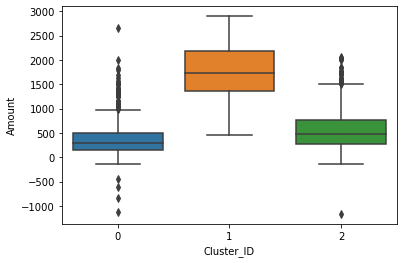

In [52]:
# Boxplot to visualize Cluster_ID vs Amount
sns.boxplot(x = 'Cluster_ID', y = 'Amount', data = RFM)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Frequency'>

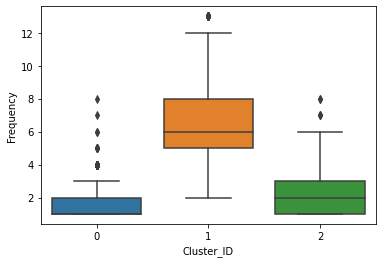

In [53]:
# Boxplot to visualize Cluster_ID vs Frequency
sns.boxplot(x='Cluster_ID', y='Frequency', data=RFM)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Recency'>

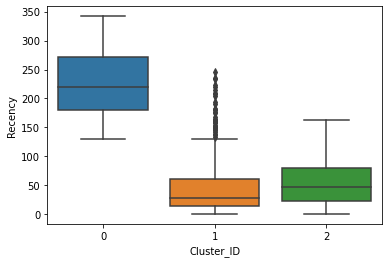

In [54]:
# Boxplot to visualize Cluster_ID vs Recency
sns.boxplot(x='Cluster_ID', y='Recency', data=RFM)

## Hierarchical Clustering 

In [55]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,
##### 1- Divisive , 2- Agglomertive 

### Linkage - It means which metric should we use to check the similarity between two clusters. There are 3 types of Linkages. 

##### 1- SIngle Linkage: In Single Linkage Hierarchical clustering the distance between two cluster is defined as the shortest distance between two points in each cluster. 

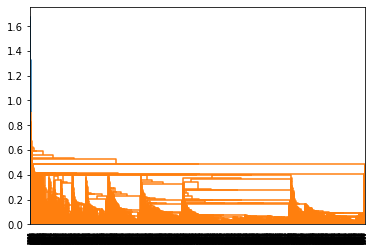

In [56]:
# Single Linkage code

mergings = linkage(rfm_df_scaled, method = "single", metric = 'euclidean')
dendrogram(mergings)
plt.show()

##### 2- Complete Linkage: In complete linkage hierarchical clustering the distance between two clusters is defined as the longest distance between two points in each cluster. 

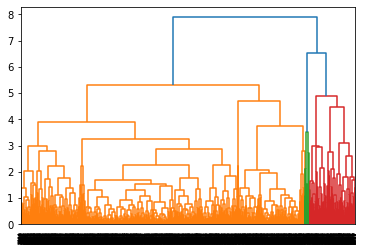

In [57]:
# Complete Linkage code
mergings = linkage(rfm_df_scaled, method = "complete", metric = 'euclidean')
dendrogram(mergings)
plt.show()

##### 3- Average Linkage- In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. 

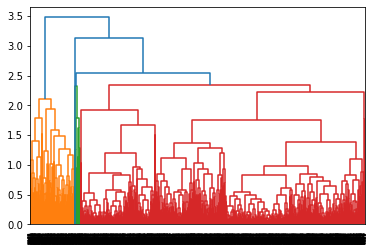

In [58]:
# Average Linkage code
mergings = linkage(rfm_df_scaled, method = "average", metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [64]:
# We will use the cut tree function to specify how many clusters are required

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Assign cluster labels
RFM['Cluster_Labels'] = cluster_labels
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID,Cluster_Labels
0,12346.0,0.00,2,326,0,0
2,12348.0,1797.24,4,76,1,0
3,12349.0,1757.55,1,19,2,0
4,12350.0,334.40,1,311,0,0
5,12352.0,1545.41,11,73,1,1


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

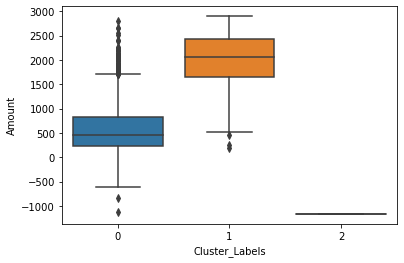

In [66]:
# Plot Cluster Id vs Amount
sns.boxplot(x='Cluster_Labels', y='Amount', data=RFM)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

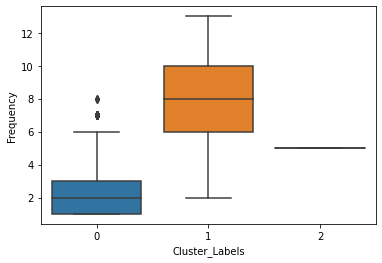

In [67]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=RFM)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

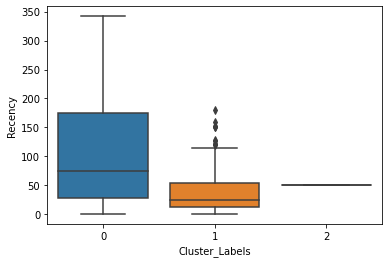

In [68]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=RFM)